<a href="https://colab.research.google.com/github/adalbertii/Modele-regresyjne/blob/main/Scikeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError,mean_squared_error
#from scikeras.wrappers import KerasRegressor
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
print("The shape of the dataset is:",df.shape)

The shape of the dataset is: (205, 26)


In [7]:
def strings_to_num(x):
    x = x.lower()
    string_to_num_dict = {'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12}
    return string_to_num_dict[x]


string_to_num_dict = {'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12}
df['doornumber'] = df['doornumber'].apply(lambda x:string_to_num_dict[x])
df['cylindernumber'] = df['cylindernumber'].apply(lambda x:string_to_num_dict[x])



We will encode remaining categorical variables using sklearn label encoder module

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html



In [8]:
le_encoder = LabelEncoder()
cat_features = ['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']
for col in cat_features:
    df[col+'_le_transformed'] = le_encoder.fit_transform(df[col])

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,citympg,highwaympg,price,fueltype_le_transformed,aspiration_le_transformed,carbody_le_transformed,drivewheel_le_transformed,enginelocation_le_transformed,enginetype_le_transformed,fuelsystem_le_transformed
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,21,27,13495.0,1,0,0,2,0,0,5
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,21,27,16500.0,1,0,0,2,0,0,5
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,19,26,16500.0,1,0,2,2,0,5,5
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,24,30,13950.0,1,0,3,1,0,3,5
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,18,22,17450.0,1,0,3,0,0,3,5




We will use sklearn minmax scaler to scale the data

Ref : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [10]:
df_model = df.drop(columns = cat_features+['car_ID', 'symboling', 'CarName'])

In [11]:
df_model.head()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,citympg,highwaympg,price,fueltype_le_transformed,aspiration_le_transformed,carbody_le_transformed,drivewheel_le_transformed,enginelocation_le_transformed,enginetype_le_transformed,fuelsystem_le_transformed
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,21,27,13495.0,1,0,0,2,0,0,5
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,21,27,16500.0,1,0,0,2,0,0,5
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,19,26,16500.0,1,0,2,2,0,5,5
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,24,30,13950.0,1,0,3,1,0,3,5
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,18,22,17450.0,1,0,3,0,0,3,5


Pearson correlation coefficient


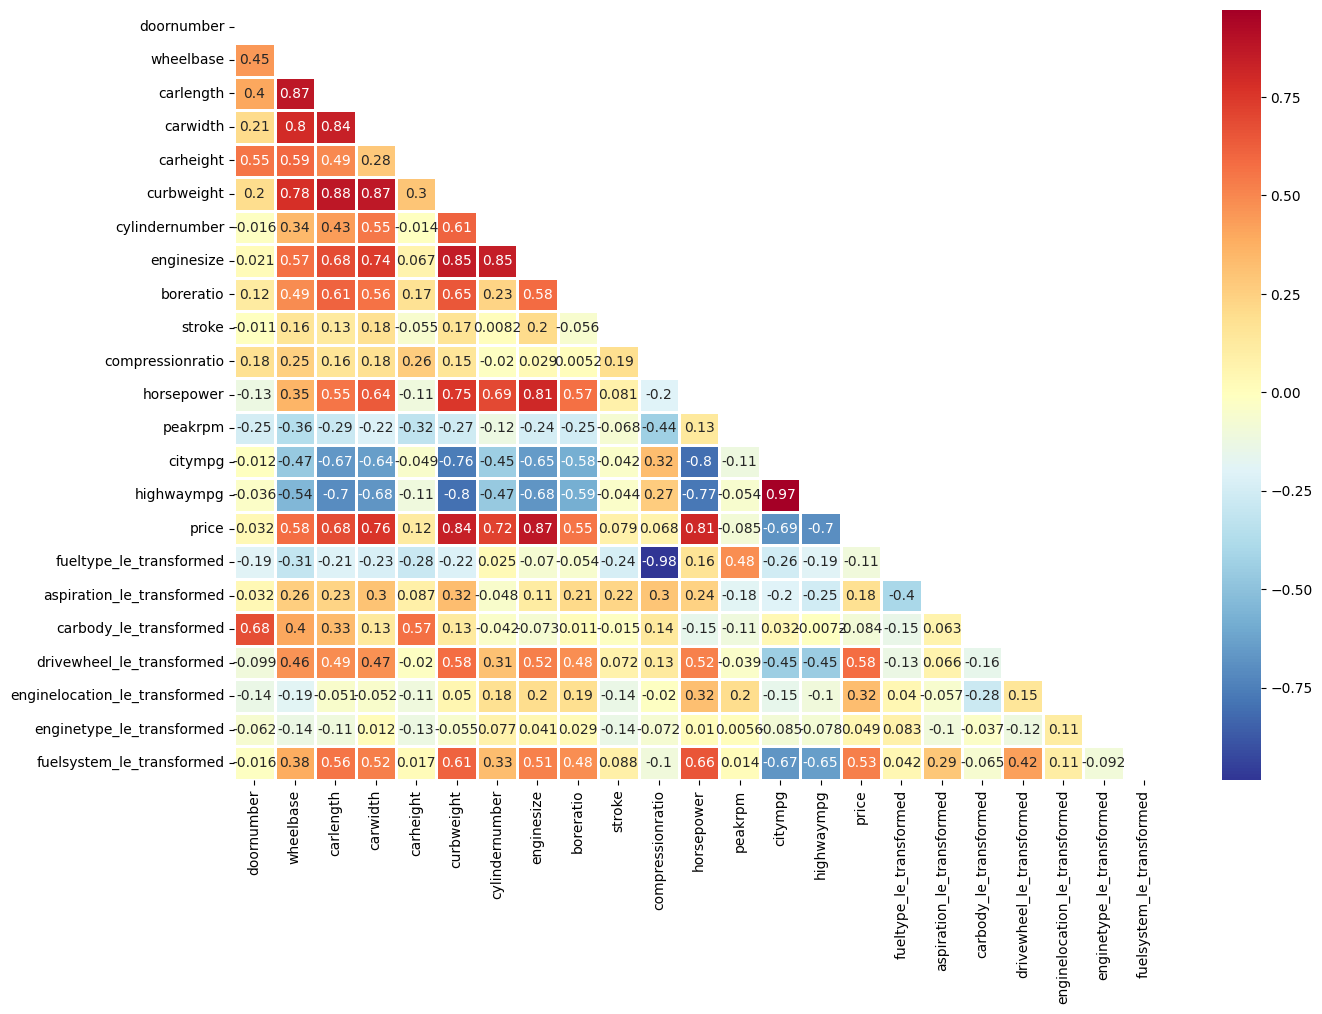

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_model.corr(), mask=np.triu(df_model.corr()), annot=True, cmap='RdYlBu_r',
           linewidth=1, linecolor='white')
plt.show()


Unique values

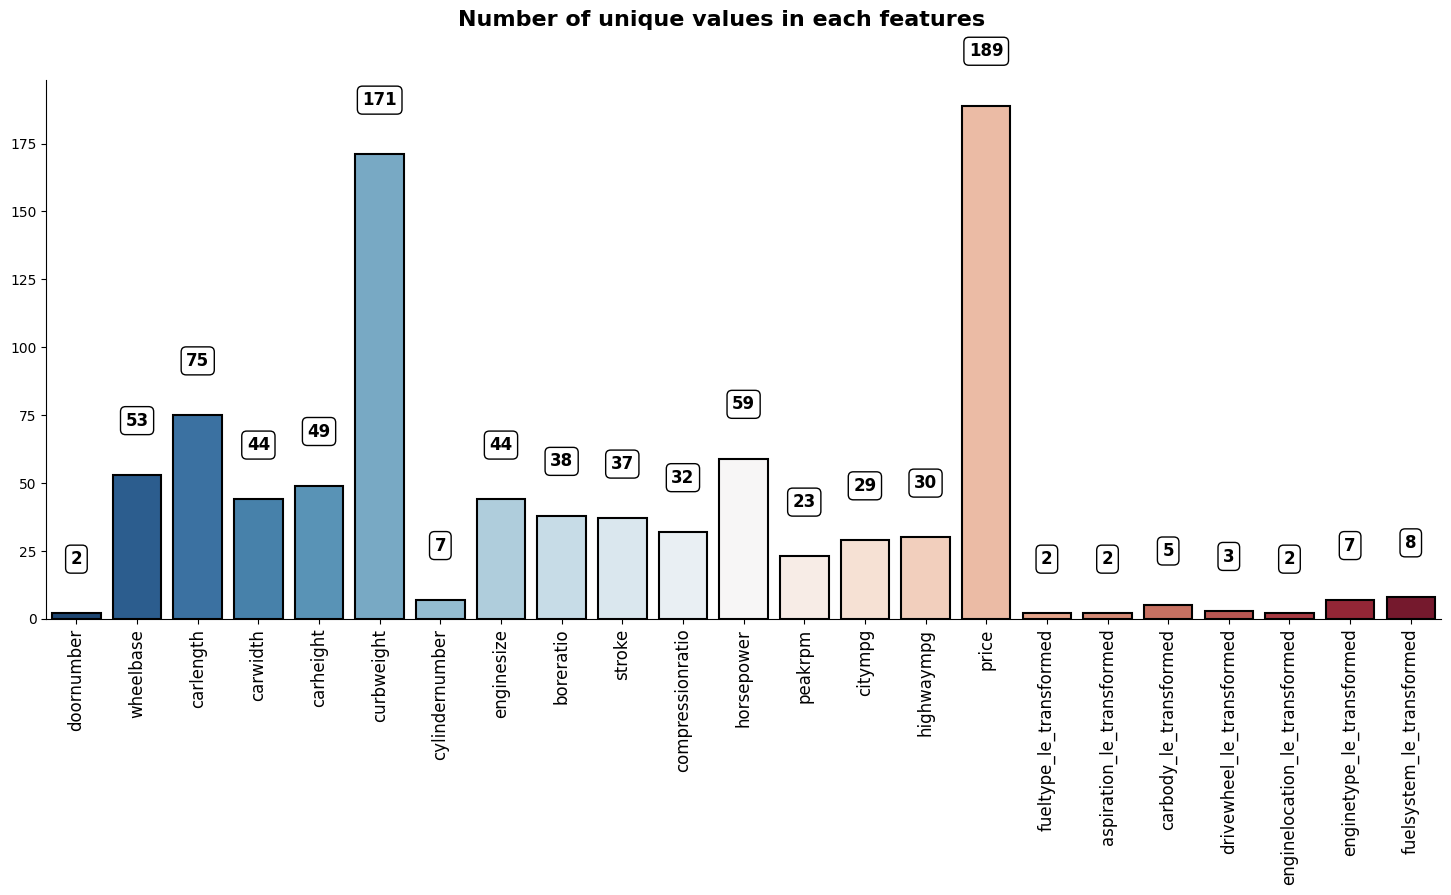

In [13]:
plt.figure(figsize=(18,7))

ax = sns.barplot(x=df_model.columns, y=df_model.nunique().values,
            palette='RdBu_r', linewidth=1.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=12)

for p in ax.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k'))

plt.suptitle(t = 'Number of unique values in each features', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

In [14]:
X = df_model.drop(columns=['price']).values
y = df_model.price.values
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.reshape(-1,1))
n_features = X.shape[1]

In [19]:
X[:1,]

array([[0.        , 0.05830904, 0.41343284, 0.31666667, 0.08333333,
        0.41117145, 0.2       , 0.26037736, 0.66428571, 0.29047619,
        0.125     , 0.2625    , 0.34693878, 0.22222222, 0.28947368,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.71428571]])

In [20]:
y[:1]

array([[0.20795889]])

In [21]:
def shallow_NN_model():
    shallow_NN = Sequential()
    shallow_NN.add(Dense(
        units = 16,
        kernel_initializer="uniform",
        activation="relu",
        input_dim = n_features
        ))
    shallow_NN.add(Dense(
        units = 1,
        kernel_initializer="uniform",
        activation="linear"
        ))
    opt = SGD(learning_rate=0.01)
    shallow_NN.compile(
        optimizer = opt,
        loss="mse",
        metrics=[RootMeanSquaredError()]
        )
    return shallow_NN

In [29]:
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
! pip install Keras

In [32]:
! pip install scikeras

In [33]:
from scikeras.wrappers import KerasRegressor
